# Preprocessing of games dataset

In [1]:
#import all the libraries gonna need
import pandas as pd 
import numpy as np
import math
#plots
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
#text mining for games descriptions
from keybert import KeyBERT
from nltk.corpus import stopwords
import string

In [2]:
df_details=pd.read_csv('games_details.csv')

In [3]:
df_details.head()

appid                      name release_date  english         developer  \
0     10            Counter-Strike     01-11-00        1             Valve   
1     20     Team Fortress Classic     01-04-99        1             Valve   
2     30             Day of Defeat     01-05-03        1             Valve   
3     40        Deathmatch Classic     01-06-01        1             Valve   
4     50  Half-Life Opposing Force     01-11-99        1  Gearbox Software   

  publisher          platforms  required_age  \
0     Valve  windows;mac;linux             0   
1     Valve  windows;mac;linux             0   
2     Valve  windows;mac;linux             0   
3     Valve  windows;mac;linux             0   
4     Valve  windows;mac;linux             0   

                                          categories  genres  \
0  Multi-player;Online Multi-Player;Local Multi-P...  Action   
1  Multi-player;Online Multi-Player;Local Multi-P...  Action   
2              Multi-player;Valve Anti-Cheat enabled  Action   
3  Multi-player;Online Multi-Player;Local Multi-P...  Action   
4  Single-player;Multi-player;Valve Anti-Cheat en...  Action   

                  steamspy_tags  achievements  positive_ratings  \
0        Action;FPS;Multiplayer             0            124534   
1        Action;FPS;Multiplayer             0              3318   
2  FPS;World War II;Multiplayer             0              3416   
3        Action;FPS;Multiplayer             0              1273   
4             FPS;Action;Sci-fi             0              5250   

   negative_ratings  average_playtime  median_playtime             owners  \
0              3339             17612              317  10000000-20000000   
1               633               277               62   5000000-10000000   
2               398               187               34   5000000-10000000   
3               267               258              184   5000000-10000000   
4               288               624              415   5000000-10000000   

   price  
0   7.19  
1   3.99  
2   3.99  
3   3.99  
4   3.99

In [4]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [5]:
df_details.describe()

appid       english  required_age  achievements  \
count  2.707500e+04  27075.000000  27075.000000  27075.000000   
mean   5.962035e+05      0.981127      0.354903     45.248864   
std    2.508942e+05      0.136081      2.406044    352.670281   
min    1.000000e+01      0.000000      0.000000      0.000000   
25%    4.012300e+05      1.000000      0.000000      0.000000   
50%    5.990700e+05      1.000000      0.000000      7.000000   
75%    7.987600e+05      1.000000      0.000000     23.000000   
max    1.069460e+06      1.000000     18.000000   9821.000000   

       positive_ratings  negative_ratings  average_playtime  median_playtime  \
count      2.707500e+04      27075.000000      27075.000000      27075.00000   
mean       1.000559e+03        211.027147        149.804949        146.05603   
std        1.898872e+04       4284.938531       1827.038141       2353.88008   
min        0.000000e+00          0.000000          0.000000          0.00000   
25%        6.000000e+00          2.000000          0.000000          0.00000   
50%        2.400000e+01          9.000000          0.000000          0.00000   
75%        1.260000e+02         42.000000          0.000000          0.00000   
max        2.644404e+06     487076.000000     190625.000000     190625.00000   

              price  
count  27075.000000  
mean       6.078193  
std        7.874922  
min        0.000000  
25%        1.690000  
50%        3.990000  
75%        7.190000  
max      421.990000

We will inspect all the attributes of our dataframe.

###### English Dictionary

In [6]:
dictionary = df_details["english"].value_counts()
print(dictionary)

1    26564
0      511
Name: english, dtype: int64


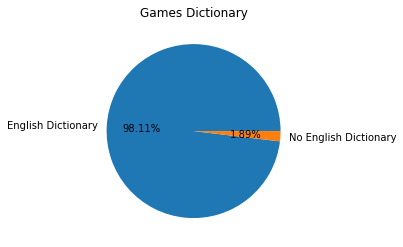

In [7]:
labels = ['English Dictionary', 'No English Dictionary']

#create pie chart
plt.pie(dictionary, labels = labels,autopct='%.2f%%')
plt.title("Games Dictionary")
plt.show()

We will try to clean the dataset from non-English words.

In [8]:
def isEnglish(s):
  return s.isascii()

remove_rows = []
for i in range(df_details.shape[0]):
    if isEnglish(df_details.iloc[i]["name"]) == False:
        remove_rows.append(i)
        continue
    if isEnglish(df_details.iloc[i]["developer"]) == False:
        remove_rows.append(i)
        continue
    if isEnglish(df_details.iloc[i]["publisher"]) == False:
        remove_rows.append(i)
        continue
    if isEnglish(df_details.iloc[i]["categories"]) == False:
        remove_rows.append(i)
        continue
    if isEnglish(df_details.iloc[i]["steamspy_tags"]) == False:
        remove_rows.append(i)
        continue

In [9]:
print("Total number of rows must be removed:",len(remove_rows))
#print(len(np.unique(remove_rows)))
print("Initial number of rows in our dataset:", df_details.shape[0])
df_details = df_details.drop(remove_rows, axis=0)
print("Final number of rows in our dataset:", df_details.shape[0])

Total number of rows must be removed: 1435
Initial number of rows in our dataset: 27075
Final number of rows in our dataset: 25640


We will execute again the first two commands to compare the results.

In [10]:
dictionary = df_details["english"].value_counts()
print(dictionary)

1    25487
0      153
Name: english, dtype: int64


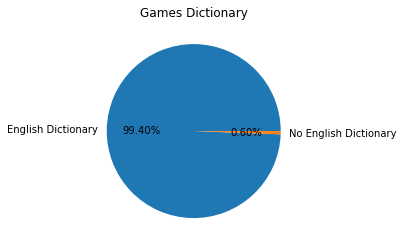

In [11]:
labels = ['English Dictionary', 'No English Dictionary']

#create pie chart
plt.pie(dictionary, labels = labels,autopct='%.2f%%')
plt.title("Games Dictionary")
plt.show()

###### Release Date

In [12]:
release = df_details["release_date"]
year = []
full_date = []
for element in release:
    if int(str(element[6:8])) > 95:
        year.append(1900+int(str(element[6:8])))
        full_date.append(str(element[:6])+str(1900+int(str(element[6:8]))))
    else:
        year.append(2000+int(str(element[6:8])))
        full_date.append(str(element[:6])+str(2000+int(str(element[6:8]))))
release_array = np.unique(np.array(year))
release_count_list = []
for i in release_array:
    print("In",i,"have/s been developed", year.count(i), "game(s).")
    release_count_list.append(year.count(i)) 
df_details["release_date"] = full_date

In 1997 have/s been developed 1 game(s).
In 1998 have/s been developed 1 game(s).
In 1999 have/s been developed 2 game(s).
In 2000 have/s been developed 2 game(s).
In 2001 have/s been developed 4 game(s).
In 2002 have/s been developed 1 game(s).
In 2003 have/s been developed 3 game(s).
In 2004 have/s been developed 6 game(s).
In 2005 have/s been developed 6 game(s).
In 2006 have/s been developed 47 game(s).
In 2007 have/s been developed 92 game(s).
In 2008 have/s been developed 144 game(s).
In 2009 have/s been developed 298 game(s).
In 2010 have/s been developed 235 game(s).
In 2011 have/s been developed 235 game(s).
In 2012 have/s been developed 318 game(s).
In 2013 have/s been developed 401 game(s).
In 2014 have/s been developed 1522 game(s).
In 2015 have/s been developed 2525 game(s).
In 2016 have/s been developed 4235 game(s).
In 2017 have/s been developed 6026 game(s).
In 2018 have/s been developed 7578 game(s).
In 2019 have/s been developed 1958 game(s).


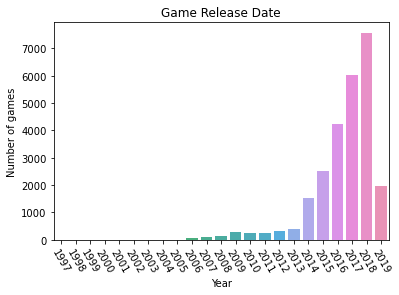

In [13]:
sns.barplot(y=np.array(release_count_list), x=release_array)
plt.xticks(rotation=-60)
plt.title('Game Release Date')
plt.xlabel('Year')
plt.ylabel('Number of games')
plt.show()

In [14]:
df_details.head()

appid                      name release_date  english         developer  \
0     10            Counter-Strike   01-11-2000        1             Valve   
1     20     Team Fortress Classic   01-04-1999        1             Valve   
2     30             Day of Defeat   01-05-2003        1             Valve   
3     40        Deathmatch Classic   01-06-2001        1             Valve   
4     50  Half-Life Opposing Force   01-11-1999        1  Gearbox Software   

  publisher          platforms  required_age  \
0     Valve  windows;mac;linux             0   
1     Valve  windows;mac;linux             0   
2     Valve  windows;mac;linux             0   
3     Valve  windows;mac;linux             0   
4     Valve  windows;mac;linux             0   

                                          categories  genres  \
0  Multi-player;Online Multi-Player;Local Multi-P...  Action   
1  Multi-player;Online Multi-Player;Local Multi-P...  Action   
2              Multi-player;Valve Anti-Cheat enabled  Action   
3  Multi-player;Online Multi-Player;Local Multi-P...  Action   
4  Single-player;Multi-player;Valve Anti-Cheat en...  Action   

                  steamspy_tags  achievements  positive_ratings  \
0        Action;FPS;Multiplayer             0            124534   
1        Action;FPS;Multiplayer             0              3318   
2  FPS;World War II;Multiplayer             0              3416   
3        Action;FPS;Multiplayer             0              1273   
4             FPS;Action;Sci-fi             0              5250   

   negative_ratings  average_playtime  median_playtime             owners  \
0              3339             17612              317  10000000-20000000   
1               633               277               62   5000000-10000000   
2               398               187               34   5000000-10000000   
3               267               258              184   5000000-10000000   
4               288               624              415   5000000-10000000   

   price  
0   7.19  
1   3.99  
2   3.99  
3   3.99  
4   3.99

###### Developer

We remove the spaces between words.

In [15]:
dev_list = []
for dev in df_details["developer"]:
    dev_list.append(dev.replace(" ",""))
df_details["developer"] = dev_list

We are calculating the number of different developers in our dataset.

In [16]:
developer = df_details["developer"].value_counts()
print(developer)

ChoiceofGames             94
RipknotSystems            62
LaushDmitriySergeevich    51
Nikita"Ghost_RUS"         49
DexionGames               45
                          ..
RecklessGamesUG            1
SergioCastillo             1
XibalbaStudios             1
KayoCarvalho               1
ImmersiveDouro             1
Name: developer, Length: 16188, dtype: int64


We will check if some games have been developed by more than one developers.

In [17]:
manual_developer_list = []
for dev in df_details["developer"]:
    if ";" in dev:
        for i in list(dev.split(";")):
            manual_developer_list.append(i)
    else:
        manual_developer_list.append(dev)
dev_array = np.array(manual_developer_list)
dev_df = pd.DataFrame(dev_array, columns = ['Column_dev'])
print(dev_df)

             Column_dev
0                 Valve
1                 Valve
2                 Valve
3                 Valve
4       GearboxSoftware
...                 ...
27601        SHENJIAWEI
27602     SemyonMaximov
27603       EntwicklerX
27604  YustasGameStudio
27605    AdeptStudiosGD

[27606 rows x 1 columns]


We found games with more than one developers, so we use them sepately.

The previous calculation was compining more than one developers as a new one.

In [18]:
developer = dev_df["Column_dev"].value_counts()
print(developer)
with open("developer.txt", "w") as output:
    for name, value in developer.items():
        output.write(str(name+"\n"))

ChoiceofGames             94
RipknotSystems            62
LaushDmitriySergeevich    51
Nikita"Ghost_RUS"         50
DexionGames               45
                          ..
WickedFun,Inc.             1
Mr.Podunkian               1
ConvictGames               1
ThatGuyGilby               1
ImmersiveDouro             1
Name: Column_dev, Length: 16898, dtype: int64


<AxesSubplot:title={'center':'Top 20 developers with most games'}, xlabel='count', ylabel='Column_dev'>

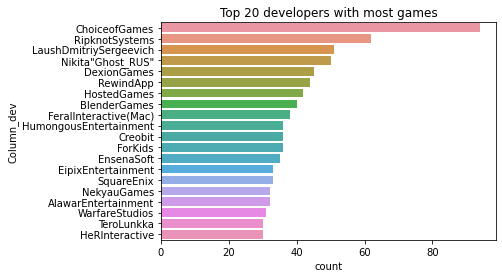

In [19]:
plt.title('Top 20 developers with most games')
sns.countplot(y="Column_dev", data=dev_df,order=dev_df.Column_dev.value_counts().iloc[:20].index)

In [20]:
small_dev = []
for dev, games in developer.items():
    if games == 1:
        small_dev.append(dev)
print("Deveopers with only one game:",len(small_dev))

Deveopers with only one game: 12827


In [21]:
# #We replace the small developers in the dataset with the string "other_developer" and we place it in the new column "dev_new".
# dev_new = []
# for devs in df_details["developer"]:
#     if ";" in devs:
#         for dev in list(devs.split(";")):
#             if small_dev.count(dev) > 0:
#                 devs.replace(dev,"other_developer")
#         dev_new.append(devs)
#     else:
#         if small_dev.count(devs) > 0:
#             dev_new.append("other_developer")
#         else:
#             dev_new.append(devs)
# df_details["dev_new"] = dev_new

###### Publishers

We remove the spaces between words.

In [22]:
pub_list = []
for pub in df_details["publisher"]:
    pub_list.append(pub.replace(" ",""))
df_details["publisher"] = pub_list

In [23]:
publisher = df_details["publisher"].value_counts()
print(publisher)

BigFishGames              211
StrategyFirst             136
THQNordic                  98
SquareEnix                 96
Ubisoft                    94
                         ... 
SaurusDigital               1
OneWheelStudio              1
nocanwin                    1
Playmous;PlugInDigital      1
DopplerInteractive          1
Name: publisher, Length: 13517, dtype: int64


As we do before with developers, we will check if some games have been published by more than one publishers.

In [24]:
manual_publisher_list = []
for pub in df_details["publisher"]:
    if ";" in pub:
        for i in list(pub.split(";")):
            manual_publisher_list.append(i)
    else:
        manual_publisher_list.append(pub)
pub_array = np.array(manual_publisher_list)
pub_df = pd.DataFrame(pub_array, columns = ['Column_pub'])
print(pub_df)

                Column_pub
0                    Valve
1                    Valve
2                    Valve
3                    Valve
4                    Valve
...                    ...
26506           SHENJIAWEI
26507      BekkerDevStudio
26508          EntwicklerX
26509  AlawarEntertainment
26510  AlawarEntertainment

[26511 rows x 1 columns]


In [25]:
publisher = pub_df["Column_pub"].value_counts()
print(publisher)
with open("publisher.txt", "w") as output:
    for name, value in publisher.items():
        output.write(str(name+"\n"))

BigFishGames           211
StrategyFirst          136
THQNordic              118
PlugInDigital          108
SquareEnix             103
                      ... 
Jogaloca                 1
PseudocodeGames          1
PalominoStudio           1
Atlas"Incawporated"      1
KIXEYE                   1
Name: Column_pub, Length: 13497, dtype: int64


<AxesSubplot:title={'center':'Top 20 publishers with most games'}, xlabel='count', ylabel='Column_pub'>

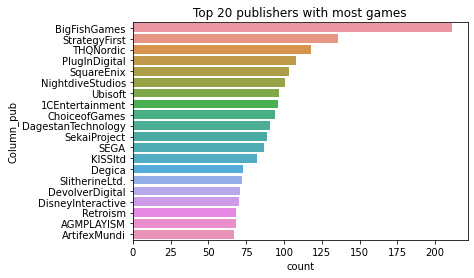

In [26]:
plt.title('Top 20 publishers with most games')
sns.countplot(y="Column_pub", data=pub_df,order=pub_df.Column_pub.value_counts().iloc[:20].index)

In [27]:
small_pub = []
for pub, games in publisher.items():
    if games == 1:
        small_pub.append(pub)
print("Publishers with only one game:",len(small_pub))

Publishers with only one game: 10282


In [28]:
# #We replace the small publishers in the dataset with the string "other_publisher" and we place it in the new column "pub_new".
# pub_new = []
# for pubs in df_details["publisher"]:
#     if ";" in pubs:
#         for pub in list(pubs.split(";")):
#             if small_pub.count(pub) > 0:
#                 pubs.replace(pub,"other_publisher")
#         pub_new.append(pubs)
#     else:
#         if small_pub.count(pubs) > 0:
#             pub_new.append("other_publisher")
#         else:
#             pub_new.append(pubs)
# df_details["pub_new"] = pub_new

###### Platforms

In [29]:
windows = []
mac = []
linux = []
for i in range(df_details.shape[0]):
#################################
    if 'windows' in df_details.iloc[i]['platforms']:
        windows.append(1)
    else:
        windows.append(0)
#################################
    if 'mac' in df_details.iloc[i]['platforms']:
        mac.append(1)
    else:
        mac.append(0)
#################################     
    if 'linux' in df_details.iloc[i]['platforms']:
        linux.append(1)
    else:
        linux.append(0)

df_details = df_details.drop(['platforms'], axis=1)
df_details['windows'] = windows
df_details['mac'] = mac
df_details['linux'] = linux

In [30]:
print("Games supported by windows:",df_details['windows'].sum())
print("Games supported by linux:",df_details['linux'].sum())
print("Games supported by mac:",df_details['mac'].sum())

Games supported by windows: 25635
Games supported by linux: 5075
Games supported by mac: 7797


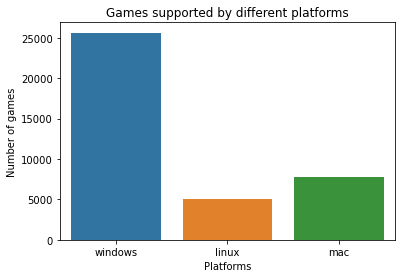

In [31]:
sns.barplot(x=np.array(['windows','linux','mac']), y=[df_details['windows'].sum(),df_details['linux'].sum(),df_details['mac'].sum()])
plt.title('Games supported by different platforms')
plt.xlabel('Platforms')
plt.ylabel('Number of games')
plt.show()

###### Games - age limits

In [32]:
required_age = df_details["required_age"].value_counts()
print(required_age)

0     25076
18      290
16      183
12       70
3        11
7        10
Name: required_age, dtype: int64


[564, 25076]


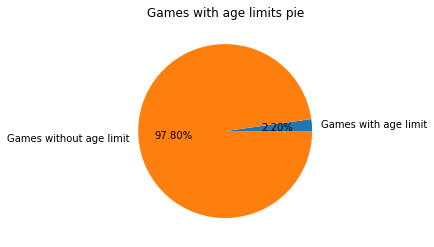

In [33]:
labels = ['Games with age limit', 'Games without age limit']
limits = [0,0]
for i in df_details["required_age"]:
    if i > 0:
        limits[0]+=1
limits[1] = df_details.shape[0]-limits[0]
print(limits)
#create pie chart
plt.pie(limits, labels = labels,autopct='%.2f%%')
plt.title("Games with age limits pie")
plt.show()

###### Categories

In [34]:
cat_list = []
for cat in df_details["categories"]:
    cat_list.append(cat.replace(" ",""))
df_details["categories"] = cat_list

In [35]:
category = []
for cat in df_details["categories"]:
    if ";" in cat:
        for i in list(cat.split(";")):
            category.append(i)
    else:
        category.append(cat)
cat_array = np.array(category)
cat_df = pd.DataFrame(cat_array, columns = ['Column_cat'])
print(cat_df)

                   Column_cat
0                Multi-player
1          OnlineMulti-Player
2           LocalMulti-Player
3      ValveAnti-Cheatenabled
4                Multi-player
...                       ...
85752              SteamCloud
85753           Single-player
85754              SteamCloud
85755           Single-player
85756              SteamCloud

[85757 rows x 1 columns]


In [36]:
categories = cat_df["Column_cat"].value_counts()
print(categories)
with open("category.txt", "w") as output:
    for name, value in categories.items():
        output.write(str(name+"\n"))

Single-player                24298
SteamAchievements            13464
SteamTradingCards             7637
SteamCloud                    6762
Fullcontrollersupport         5493
PartialControllerSupport      3997
Multi-player                  3856
SteamLeaderboards             3324
OnlineMulti-Player            2393
Shared/SplitScreen            2096
Stats                         1831
Co-op                         1682
LocalMulti-Player             1576
Cross-PlatformMultiplayer     1060
OnlineCo-op                   1036
LocalCo-op                    1024
Includesleveleditor           1008
SteamWorkshop                  863
Captionsavailable              699
In-AppPurchases                660
MMO                            407
VRSupport                      223
Commentaryavailable            134
ValveAnti-Cheatenabled          94
SteamTurnNotifications          63
SteamVRCollectibles             40
IncludesSourceSDK               34
Mods                             2
Mods(requireHL2)    

In [37]:
multiplayer = ["Multi-player", "SteamLeaderboards", "OnlineMulti-Player", "Shared/SplitScreen", "Co-op", "LocalMulti-Player", "Cross-PlatformMultiplayer", "OnlineCo-op", "LocalCo-op", "Commentaryavailable", "ValveAnti-Cheatenabled"]

In [38]:
#We will split the games in two categories: multiplayer and no-multiplayer
cat_new = []
for categories in df_details["categories"]:
    if ";" in categories:
        check = 0
        for cat in list(categories.split(";")):
            if multiplayer.count(cat) > 0:
                check = 1
                break
        if check == 1:
            cat_new.append("multiplayer")
        else:
            cat_new.append("no_multiplayer")
    else:
        if multiplayer.count(categories) > 0:
            cat_new.append("multiplayer")
        else:
            cat_new.append("no_multiplayer")
df_details["cat_new"] = cat_new

In [39]:
categories_new = df_details["cat_new"].value_counts()
print(categories_new)

no_multiplayer    17447
multiplayer        8193
Name: cat_new, dtype: int64


###### Genres

In [40]:
gen_list = []
for gen in df_details["genres"]:
    gen_list.append(gen.replace(" ",""))
df_details["genres"] = gen_list

In [41]:
genre = []
for gen in df_details["genres"]:
    if ";" in gen:
        for i in list(gen.split(";")):
            genre.append(i)
    else:
        genre.append(gen)
gen_array = np.array(genre)
gen_df = pd.DataFrame(gen_array, columns = ['Column_gen'])
print(gen_df)

      Column_gen
0         Action
1         Action
2         Action
3         Action
4         Action
...          ...
72325     Casual
72326      Indie
72327  Adventure
72328     Casual
72329      Indie

[72330 rows x 1 columns]


In [42]:
genres = gen_df["Column_gen"].value_counts()
print(genres)
with open("genre.txt", "w") as output:
    for name, value in genres.items():
        output.write(str(name+"\n"))

Indie                   18480
Action                  11450
Casual                   9653
Adventure                9397
Strategy                 4912
Simulation               4899
RPG                      3894
EarlyAccess              2810
FreetoPlay               1589
Sports                   1275
Racing                    978
Violent                   813
MassivelyMultiplayer      678
Gore                      518
Nudity                    248
SexualContent             227
Utilities                 143
Design&Illustration        85
Animation&Modeling         77
Education                  49
VideoProduction            36
SoftwareTraining           30
AudioProduction            28
WebPublishing              27
GameDevelopment            16
PhotoEditing               11
Accounting                  5
Documentary                 1
Tutorial                    1
Name: Column_gen, dtype: int64


In [43]:
#split games in 5 genres
other = ["Tutorial", "Documentary", "Accounting", "PhotoEditing", "GameDevelopment", "WebPublishing", "AudioProduction", "SoftwareTraining", "VideoProduction", "Education", "Animation&Modeling", "Design&Illustration"]
action = ["Action", "Adventure", "Strategy", "Simulation"]
sports_racing = ["Racing", "Sports"]
violent = ["RPG", "Violent", "Gore", "Nudity", "SexualContent"]
casual = ["Casual"]

In [44]:
genre_new = []
for genres in df_details["genres"]:
    if ";" in genres:
        current_game_genres = []
        for gen in list(genres.split(";")):
            if violent.count(gen) > 0:
                current_game_genres.append("violent")
            elif sports_racing.count(gen) > 0:
                current_game_genres.append("sports_racing")
            elif casual.count(gen) > 0:
                current_game_genres.append("casual")
            elif action.count(gen) > 0:
                current_game_genres.append("action")
            else:
                current_game_genres.append("other")
        if current_game_genres.count("violent") > 0:
            genre_new.append("violent")
        elif current_game_genres.count("sports_racing") > 0:
            genre_new.append("sports_racing")
        elif current_game_genres.count("casual") > 0:
            genre_new.append("casual")
        elif current_game_genres.count("action") > 0:
            genre_new.append("action")
        else:
            genre_new.append("other")
    else:
        if violent.count(genres) > 0:
            genre_new.append("violent")
        elif sports_racing.count(genres) > 0:
            genre_new.append("sports_racing")
        elif casual.count(genres) > 0:
            genre_new.append("casual")
        elif action.count(genres) > 0:
            genre_new.append("action")
        else:
            genre_new.append("other")
df_details["genre_new"] = genre_new

In [45]:
df_details.head()

appid                      name release_date  english        developer  \
0     10            Counter-Strike   01-11-2000        1            Valve   
1     20     Team Fortress Classic   01-04-1999        1            Valve   
2     30             Day of Defeat   01-05-2003        1            Valve   
3     40        Deathmatch Classic   01-06-2001        1            Valve   
4     50  Half-Life Opposing Force   01-11-1999        1  GearboxSoftware   

  publisher  required_age                                         categories  \
0     Valve             0  Multi-player;OnlineMulti-Player;LocalMulti-Pla...   
1     Valve             0  Multi-player;OnlineMulti-Player;LocalMulti-Pla...   
2     Valve             0                Multi-player;ValveAnti-Cheatenabled   
3     Valve             0  Multi-player;OnlineMulti-Player;LocalMulti-Pla...   
4     Valve             0  Single-player;Multi-player;ValveAnti-Cheatenabled   

   genres                 steamspy_tags  ...  negative_ratings  \
0  Action        Action;FPS;Multiplayer  ...              3339   
1  Action        Action;FPS;Multiplayer  ...               633   
2  Action  FPS;World War II;Multiplayer  ...               398   
3  Action        Action;FPS;Multiplayer  ...               267   
4  Action             FPS;Action;Sci-fi  ...               288   

   average_playtime  median_playtime             owners  price windows  mac  \
0             17612              317  10000000-20000000   7.19       1    1   
1               277               62   5000000-10000000   3.99       1    1   
2               187               34   5000000-10000000   3.99       1    1   
3               258              184   5000000-10000000   3.99       1    1   
4               624              415   5000000-10000000   3.99       1    1   

   linux      cat_new  genre_new  
0      1  multiplayer     action  
1      1  multiplayer     action  
2      1  multiplayer     action  
3      1  multiplayer     action  
4      1  multiplayer     action  

[5 rows x 22 columns]

In [46]:
genres = df_details["genre_new"].value_counts()
print(genres)

action           10140
casual            7801
violent           4818
sports_racing     1812
other             1069
Name: genre_new, dtype: int64


###### Game tags

In [47]:
tag_list = []
for tag in df_details["steamspy_tags"]:
    tag_list.append(tag.replace(" ",""))
df_details["steamspy_tags"] = tag_list

In [48]:
tags = []
for tag in df_details["steamspy_tags"]:
    if ";" in tag:
        for i in list(tag.split(";")):
            tags.append(i)
    else:
        tags.append(tag)
tag_array = np.array(tags)
tag_df = pd.DataFrame(tag_array, columns = ['Column_tag'])
print(tag_df)

        Column_tag
0           Action
1              FPS
2      Multiplayer
3           Action
4              FPS
...            ...
73944       Casual
73945    Adventure
73946        Indie
73947       Casual
73948    Adventure

[73949 rows x 1 columns]


In [49]:
tags = tag_df["Column_tag"].value_counts()
print(tags)

Indie               15459
Action               9919
Casual               7769
Adventure            7273
Strategy             3924
                    ...  
GunCustomization        1
Skating                 1
LaraCroft               1
Sailing                 1
Diplomacy               1
Name: Column_tag, Length: 337, dtype: int64


<AxesSubplot:title={'center':'Top 20 tags in our dataset'}, xlabel='count', ylabel='Column_tag'>

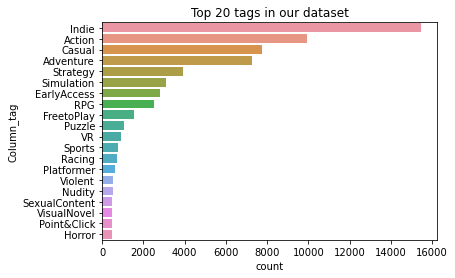

In [50]:
plt.title('Top 20 tags in our dataset')
sns.countplot(y="Column_tag", data=tag_df,order=tag_df.Column_tag.value_counts().iloc[:20].index)

In [51]:
less_popular_tags = []
for tag, games in tags.items():
    if games == 1:
        less_popular_tags.append(tag)
print("Tags matched with only one game:",len(less_popular_tags))

Tags matched with only one game: 28


In [52]:
# #As we did with developers and publishers, we change the tags matched in only one game with the string "other_tag".
# tag_new = []
# for tags in df_details["steamspy_tags"]:
#     if ";" in tags:
#         for tag in list(tags.split(";")):
#             if less_popular_tags.count(tag) > 0:
#                 tags.replace(tag,"other_tag")
#         tag_new.append(tags)
#     else:
#         if less_popular_tags.count(tags) > 0:
#             tag_new.append("other_tag")
#         else:
#             tag_new.append(tags)
# df_details["tag_new"] = tag_new

###### Achievements

In [53]:
achievements = df_details["achievements"].value_counts()
print(achievements)

0       11163
10        648
12        597
20        549
15        475
        ...  
1000        1
952         1
600         1
408         1
2007        1
Name: achievements, Length: 400, dtype: int64


[14477, 11163]


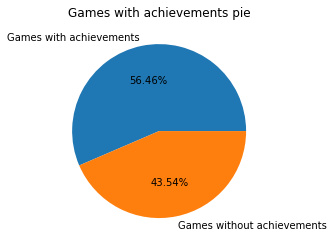

In [54]:
labels = ['Games with achievements', 'Games without achievements']
ach = [0,0]
for i in df_details["achievements"]:
    if i > 0:
        ach[0]+=1
ach[1] = df_details.shape[0]-ach[0]
print(ach)
#create pie chart
plt.pie(ach, labels = labels,autopct='%.2f%%')
plt.title("Games with achievements pie")
plt.show()

###### Game owners

In [55]:
owners = df_details["owners"].value_counts()
print(owners)

0-20000                17492
20000-50000             2911
50000-100000            1632
100000-200000           1324
200000-500000           1239
500000-1000000           501
1000000-2000000          284
2000000-5000000          185
5000000-10000000          45
10000000-20000000         21
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: owners, dtype: int64


In [56]:
most_owners = []
owners = ["20000000-50000000","50000000-100000000","100000000-200000000"]

for i in range(df_details.shape[0]):
    if df_details.iloc[i]['owners']=="100000000-200000000":
        most_owners.append(df_details.iloc[i]['name'])
        break
for i in range(df_details.shape[0]):
    if df_details.iloc[i]['owners']=="50000000-100000000":
        most_owners.append(df_details.iloc[i]['name'])
for i in range(df_details.shape[0]):
    if df_details.iloc[i]['owners']=="20000000-50000000":
        most_owners.append(df_details.iloc[i]['name'])
print("The most famous game based on the number of onwers(100000000-200000000) is",most_owners[0])
print("The second and third most famous game based on the number of onwers(50000000-100000000) are",most_owners[1],"and", most_owners[2])
print("The 4th, 5th and 6th most famous game based on the number of onwers(20000000-50000000) are",most_owners[3],",", most_owners[4],"and",most_owners[5])


The most famous game based on the number of onwers(100000000-200000000) is Dota 2
The second and third most famous game based on the number of onwers(50000000-100000000) are Counter-Strike Global Offensive and PLAYERUNKNOWN'S BATTLEGROUNDS
The 4th, 5th and 6th most famous game based on the number of onwers(20000000-50000000) are Team Fortress 2 , Warframe and Unturned


###### Price

[23237, 2403]


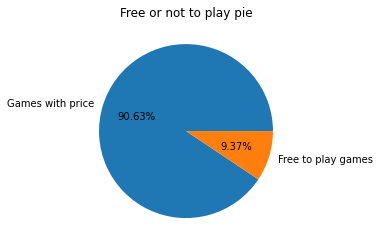

In [57]:
labels = ['Games with price', 'Free to play games']
prices = [0,0]
for i in df_details["price"]:
    if i > 0:
        prices[0]+=1
prices[1] = df_details.shape[0]-prices[0]
print(prices)
#create pie chart
plt.pie(prices, labels = labels,autopct='%.2f%%')
plt.title("Free or not to play pie")
plt.show()

###### Ratings

We will split the games in positive rated and negative rated. We will count as positive only the games with more than 20 votes.

In [58]:
rating_sign = []
for i in range(df_details.shape[0]):
    if df_details.iloc[i]['positive_ratings'] > df_details.iloc[i]['negative_ratings'] and df_details.iloc[i]['positive_ratings']+df_details.iloc[i]['negative_ratings'] >= 20:
        rating_sign.append("positive")
    else:
        rating_sign.append("negative")
df_details["rating_sign"] = rating_sign

In [59]:
sign = df_details["rating_sign"].value_counts()
print(sign)

positive    13838
negative    11802
Name: rating_sign, dtype: int64


Τα δεδομένα που χρησιμοποιούμε για τα βιντεοπαιχνίδια δεν διαθέτουν βαθμολογίες ανά παιχνίδι, παρά μόνο το πλήθος αξιολογήσεων των χρηστών. Οι χρήστες αξιολογούν το παιχνίδι είτε θετικά είτε αρνητικά. Παρακάτω μετατρέπουμε αυτές τις αξιολογήσεις χρησιμοποιώντας την τεχνική bayesian rating σε μία κλίμακα από το 0 έως το 10.

In [60]:
#bayesian rating

voted_games = 0
game_votes = 0
rating = 0
for i in range(df_details.shape[0]):
    if df_details.iloc[i]['positive_ratings'] > 0 or df_details.iloc[i]['negative_ratings'] > 0:
        voted_games = voted_games + 1
        game_votes = game_votes + df_details.iloc[i]['positive_ratings'] + df_details.iloc[i]['negative_ratings']
        rating = rating + df_details.iloc[i]['positive_ratings']/(df_details.iloc[i]['positive_ratings'] + df_details.iloc[i]['negative_ratings'])
        
avg_votes = game_votes / voted_games
avg_rating = rating / voted_games
final_game_rating = []
for i in range(df_details.shape[0]):
    if df_details.iloc[i]['positive_ratings'] > 0 or df_details.iloc[i]['negative_ratings'] > 0:
        game_votes = df_details.iloc[i]['positive_ratings'] + df_details.iloc[i]['negative_ratings']
        rating = df_details.iloc[i]['positive_ratings']/(df_details.iloc[i]['positive_ratings'] + df_details.iloc[i]['negative_ratings'])
        positive_votes_modified = avg_votes * avg_rating + game_votes * rating
        total_votes_modified = avg_votes + game_votes
        final_game_rating.append(positive_votes_modified/total_votes_modified)
    else:
        final_game_rating.append(0)
        
df_details['rating'] = [element * 10 for element in final_game_rating]

In [61]:
ratings = df_details['rating']
ratings = [math.floor(element) for element in ratings]
ratings_array = np.array(ratings)
print("The variety of different ratings:")
print(np.unique(ratings_array))

The variety of different ratings:
[3 4 5 6 7 8 9]


Με βάση τις παραπάνω αξιολογήσεις θα δημιουργήσουμε μία κλίμακα απά ένα έως πέντε αστέρια για το κάθε παιχνίδι.

In [62]:
star_ratings = []
for rate in ratings:
    if rate < 4:
        star_ratings.append(1)
    elif rate==4 or rate==5:
        star_ratings.append(2)
    elif rate==6 or rate==7:
        star_ratings.append(3)
    elif rate==8:
        star_ratings.append(4)
    elif rate==9:
        star_ratings.append(5)
df_details['stars'] = star_ratings

In [63]:
df_details.head()

appid                      name release_date  english        developer  \
0     10            Counter-Strike   01-11-2000        1            Valve   
1     20     Team Fortress Classic   01-04-1999        1            Valve   
2     30             Day of Defeat   01-05-2003        1            Valve   
3     40        Deathmatch Classic   01-06-2001        1            Valve   
4     50  Half-Life Opposing Force   01-11-1999        1  GearboxSoftware   

  publisher  required_age                                         categories  \
0     Valve             0  Multi-player;OnlineMulti-Player;LocalMulti-Pla...   
1     Valve             0  Multi-player;OnlineMulti-Player;LocalMulti-Pla...   
2     Valve             0                Multi-player;ValveAnti-Cheatenabled   
3     Valve             0  Multi-player;OnlineMulti-Player;LocalMulti-Pla...   
4     Valve             0  Single-player;Multi-player;ValveAnti-Cheatenabled   

   genres               steamspy_tags  ...             owners  price  windows  \
0  Action      Action;FPS;Multiplayer  ...  10000000-20000000   7.19        1   
1  Action      Action;FPS;Multiplayer  ...   5000000-10000000   3.99        1   
2  Action  FPS;WorldWarII;Multiplayer  ...   5000000-10000000   3.99        1   
3  Action      Action;FPS;Multiplayer  ...   5000000-10000000   3.99        1   
4  Action           FPS;Action;Sci-fi  ...   5000000-10000000   3.99        1   

   mac  linux      cat_new  genre_new  rating_sign    rating  stars  
0    1      1  multiplayer     action     positive  9.713713      5  
1    1      1  multiplayer     action     positive  8.094291      4  
2    1      1  multiplayer     action     positive  8.507062      4  
3    1      1  multiplayer     action     positive  7.758891      3  
4    1      1  multiplayer     action     positive  9.048547      5  

[5 rows x 25 columns]

###### Playtime

We will split the games in those which the user plays more time than the average time that users spent in a game and in less time.

In [64]:
playtime = []
avg_playtime = 0

for i in range(df_details.shape[0]):
    avg_playtime += df_details.iloc[i]['average_playtime']
avg_playtime = avg_playtime / (float)(df_details.shape[0])

for i in range(df_details.shape[0]):
    if avg_playtime <= df_details.iloc[i]['average_playtime']:
        playtime.append("more")
    else:
        playtime.append("less")
df_details["playtime"] = playtime

In [65]:
playtime = df_details["playtime"].value_counts()
print(playtime)

less    21761
more     3879
Name: playtime, dtype: int64


### Game Description

In [126]:
df_1 = pd.read_csv('game_description_1.csv')
df_2 = pd.read_csv('game_description_2.csv')
df_3 = pd.read_csv('game_description_3.csv')
df_4 = pd.read_csv('game_description_4.csv')
df_5 = pd.read_csv('game_description_5.csv')
df_desc = pd.concat([df_1, df_2, df_3, df_4, df_5], axis=0)

In [127]:
print("Game description observations:", df_desc.shape[0])

Game description observations: 27334


In [68]:
desc_list_id = list(df_desc["steam_appid"])
game_ids = list(df_details["appid"])

In [69]:
count = 0
for id_num in desc_list_id:
    if game_ids.count(id_num)>0:
        count+=1
print("Common games in the two datasets (game_details and game_description):", count)

Common games in the two datasets (game_details and game_description): 25640


In [70]:
remove_rows = []
for i in range(df_desc.shape[0]):
    if list(df_details["appid"]).count(df_desc.iloc[i]["steam_appid"])==0:
        remove_rows.append(i)
df_desc = df_desc.drop(remove_rows, axis=0)
df_desc = df_desc.drop(['detailed_description'], axis=1)
df_desc = df_desc.drop(['about_the_game'], axis=1)

In [71]:
remove_rows = []
for i in range(df_details.shape[0]):
    if list(df_desc["steam_appid"]).count(df_details.iloc[i]["appid"])==0:
        remove_rows.append(i)
df_details = df_details.drop(remove_rows, axis=0)

In [72]:
df_desc.head()

steam_appid                                  short_description
0           10  Play the world's number 1 online action game. ...
1           20  One of the most popular online action games of...
2           30  Enlist in an intense brand of Axis vs. Allied ...
3           40  Enjoy fast-paced multiplayer gaming with Death...
4           50  Return to the Black Mesa Research Facility as ...

In [73]:
print("Game description observations left:", df_desc.shape[0])

Game description observations left: 25640


In [74]:
df_details.head()

appid                      name release_date  english        developer  \
0     10            Counter-Strike   01-11-2000        1            Valve   
1     20     Team Fortress Classic   01-04-1999        1            Valve   
2     30             Day of Defeat   01-05-2003        1            Valve   
3     40        Deathmatch Classic   01-06-2001        1            Valve   
4     50  Half-Life Opposing Force   01-11-1999        1  GearboxSoftware   

  publisher  required_age                                         categories  \
0     Valve             0  Multi-player;OnlineMulti-Player;LocalMulti-Pla...   
1     Valve             0  Multi-player;OnlineMulti-Player;LocalMulti-Pla...   
2     Valve             0                Multi-player;ValveAnti-Cheatenabled   
3     Valve             0  Multi-player;OnlineMulti-Player;LocalMulti-Pla...   
4     Valve             0  Single-player;Multi-player;ValveAnti-Cheatenabled   

   genres               steamspy_tags  ...  price  windows  mac  linux  \
0  Action      Action;FPS;Multiplayer  ...   7.19        1    1      1   
1  Action      Action;FPS;Multiplayer  ...   3.99        1    1      1   
2  Action  FPS;WorldWarII;Multiplayer  ...   3.99        1    1      1   
3  Action      Action;FPS;Multiplayer  ...   3.99        1    1      1   
4  Action           FPS;Action;Sci-fi  ...   3.99        1    1      1   

       cat_new genre_new  rating_sign    rating  stars  playtime  
0  multiplayer    action     positive  9.713713      5      more  
1  multiplayer    action     positive  8.094291      4      more  
2  multiplayer    action     positive  8.507062      4      more  
3  multiplayer    action     positive  7.758891      3      more  
4  multiplayer    action     positive  9.048547      5      more  

[5 rows x 26 columns]

In [75]:
print("Game details observations left:", df_details.shape[0])

Game details observations left: 25640


In [76]:
description = df_desc["short_description"]

In [77]:
StopWords = stopwords.words("english")

In [78]:
new_description = []
for desc in description:
    #remove stop words, puncuation, numbers
    new_desc = ' '.join([word for word in desc.split() if word not in StopWords])
    new_desc = ''.join((x for x in new_desc if not x.isdigit()))
    new_desc = new_desc.translate(str.maketrans('', '', string.punctuation))
    new_desc = new_desc.lower()
    print(new_desc)
    new_description.append(new_desc)

play worlds number  online action game engage incredibly realistic brand terrorist warfare wildly popular teambased game ally teammates complete strategic missions take enemy sites rescue hostages your role affects teams success your teams success affects role
one popular online action games time team fortress classic features nine character classes  medic spy demolition man  enlisted unique style online team warfare each character class possesses unique weapons items abilities teams compete online variety game play modes
enlist intense brand axis vs allied teamplay set wwii european theatre operations players assume role lightassaultheavy infantry sniper machinegunner class unique arsenal historical weaponry disposal missions based key historical operations
enjoy fastpaced multiplayer gaming deathmatch classic aka dmc valves tribute work id software dmc invites players grab rocket launchers put reflexes test collection futuristic settings
return black mesa research facility one milita

on quest recover scepter zeus the museum lost secrets archeologist adventurer samantha swift stumbles upon one greatest archeological finds time unfortunately also runs greedy treasure hunter ravena stryker
its time build nine intriguing structures throughout history match runes break blocks uncover lock keystone round rotate cube face move keystone along pathways created reach levels lock conquer six sides
luxor selling actionpuzzle game blasts outside egypts borders onto silk road search riches beyond imagination one beautiful wellknown faces history also one greatest mysteries
when samanthas new benefactor asks track alexander greats scroll wealth opportunity seems good truesearching scroll collecting amazing finds museum secrets lost
care nurture tribe little people teaching basics survival they need become farmers builders scientists parents make decisions unpredictable island events guide daytoday lives help explore restore new home
somewhere pacific beautiful island called isol

you exile struggling survive dark continent wraeclast fight earn power allow exact revenge wronged you created hardcore gamers path exile online action rpg set dark fantasy world
congratulations the october labor lottery complete your name pulled for immediate placement report ministry admission grestin border checkpoint an apartment provided family east grestin expect class dwelling
a hack slash action adventure set fantasy pixel art environment play solo coop adventure bottom top castle hammerwatch kill hordes enemies varied looks features four unique environments traps hidden secrets puzzles
samurai gunn lightningfast bushido brawler two four players each samurai armed sword gun  bullets life discipline quick reflexes key deflecting bullets sending opponents’ heads rolling
final fantasy® iii one bestloved games epic rpg series available steam
firstperson action survival game set postapocalyptic open world overrun fleshhungry zombies roam city devastated mysterious virus epidemic sca

help underwater detective freddi fish finny friend luther solve case explore underwater caves deep canyons colorful reefs discover fascinating places like king crabs castle a sunken ship out time effort save reef
theres reason afraid dark fed fear dark sam transforms pajama sam  worlds youngest superhero resolves confront darkness with help king mine car otto boat host fascinating characters
the supersuave agent spy fox must find mr udderly rescue cows stop william kid depleting worlds supply milk using ingenious spy gadgets keen wits daring moves spy fox jumps udderly exhilarating adventure
help puttputt® bounce pal pep air pop colorful balloonssome filled hidden surprises
dive help freddi fish luther navigate labyrinth underwater caves collect scattered kelp seeds
originally released  pc adventure game year winner timeless pointandclick horror game musthave adventure game fans
majestic nights episodic actionadventurethriller set alternate s conspiracy theories past present true it’s 

a legendary dragon haunting lands towns set ablaze magic power resurrects evil creatures world a hero needed travel corners lands slay beast restore peace
aarus awakening hand drawn d action platformer set mythical world lumenox travel mysterious world story four gods unravels
a scifi colony sim driven intelligent ai storyteller inspired dwarf fortress firefly generates stories simulating psychology ecology gunplay melee combat climate biomes diplomacy interpersonal relationships art medicine trade more
they breathe short journey depths forest filled water as swim deeper figure rules insidious ecosystem nothing first seems everyone precious resource – oxygen
galcon  demolition derby space send swarms ships planet planet conquer galaxy fast paced multiplayer strategy game
prepare another journey series new worlds featuring multiple challenges many ways pass level resolve puzzles amen  allows hang good old friends more
a joyful casual puzzle game tease wits memory
solve mystery kraken co

yes game literally some asked for and so spirit quotwell alright then insistquot present third game carmageddon series knowledge carma fans would like complete carmageddon collection steam library nothing wrong that
the team behind you don’t know jack presents five guffawinducing party games one pack you’re gonna need one party this your phones tablets controllers for  players
it’s  california a group friends discover mysterious pink stone allows travel two realms this gang live summer lives adventure get involved government conspiracy control five kids special skills fighting solving puzzles
command squad survivors game line sight extremely important cannot shoot cannot see develop formations move unit cover every corner leave man behind
don cape mask join supreme league patriots hilarious irreverent superhero comedy adventure
time space parallel universes collapse merge tethered threads reality sustained paradoxical power source nothing impossible  time become data hacker
transform b

outwit gravity race clock explore new worldscrashed lander gravitybased arcade game inspired classics like lunar lander space taxi youll pilot craft pad pad trying beat best time – flirt fine line speed control
in tugofwar casual defense game， play leonidas heroking sparta hordes attacking zombies thermopylae recruit allies build defenses stop them
you are not a banana set everyday life sprinkle imagination humor the audiovisuals free ost included seek evoke nostalgia s s this short form experimental game unfolds sequence thought provoking events surprises
inspired demoscene project green beat’s unique levels merge stunning visuals high energy rhythms create truly unique musicbased rail shooter it fully immersive experience music inspires visuals drives flow motion
uncompromising scifi survival mars manage entire colony singlehanded craft research explore fight evolving mutants vast open world randomly generated levels explore can survive long enough escape horror
a oneofakind experien

battle head head  players cooperatively versus test skill waves ever amassing enemies
push me pull you awardwinning local multiplayer game friendship wrestling joined waist partner share long wriggling body wrestle opponents control ball
regimental chess battle game large armies chess pieces move capture mass formations up  pieces single battle
help renowned explorer adventurer adam venture accomplice evelyn discover artifacts unravel ancient mysteries decipher strange symbols solve ingenious puzzles around gorgeous historical sites s
explore fight survive unravel mysteries unique unforgiving d isometric rpg set original dark low fantasy world exanimas exceptional attention detail realistic simulation things aim provide deeply immersive dynamic gameplay experience
high on racing unique retro arcade style tactical racing game warp sky race time
construct design buildings optimal working conditions hire people design release software defeat simulated competition take businesses manage ed

te short single player experience set halflife universe featuring gravity defying weapon allows jump buildings sustain large falls the story takes place mysterious date amp location where you why sent
organ biker modern retro arcade style motorcycle action internal organ delivery game pc
the year  a secret final lunar mission retrieved hundreds moon rocks study aether research facility overtaken curiosity researchers delve deeper deeper unknown
jumpboxer pseudo bit action platformer fighting game elements as young martial artist named dag players make way level using parkourlike abilities overcome various platforming challenges well engaging combat mechanics similar found fighting games
the way pixelated fist parkour martial arts inspired freeroaming cinematic platformer while blends together gameplay concepts the prince persia karateka presented refined controls modern innovations give game intuitive fluid feel
battle brothers turn based tactical rpg leading mercenary company gritty l

break chance memento story family bonds across time involves time travel tracking serial killer potential gay romance can shuuki save people cares traveling time whether makes happy ending completely players decisions
silver knight unique isometric minirpg randomized enemy spawn placement offers challenging new experience time play any second become last dangerous land think twice making move — lives extremely hard come parts
『discouraged workers teen』 independent kinetic novel created yggdrasil studio this fifth project dw series satirical story based popular korean soap operasstyled plot it compares gayeon’s bleak everyday life dark side youth
open diner make scrumptious success enjoy solitaire hearts content bring hamburger baking skills perfection fulfill achievements the stars earn open new opportunities around usa cook solitaire feast chef solitaire usa today
a fantasy battle scroller one moment gracefully support companions magic arrows next accidentally throw goblin mayhem
a fi

squids from space teambased pvp topdown shooter humans sinister squid aliens wage war future earth
state mind futuristic thriller game delving transhumanism the game explores themes separation disjuncture reunification world torn dystopian material reality utopian virtual future
a bit retro action platformer goes beyond pixels chiptunes
enter kingdom queen night start journey lands mystery magic prince tamino choose steps wisely build path avoiding traps deadly serpents earth quakes but know fear lose hope remember master path
a scifi yuri visual novel dollop mystery
topdown view d racing game realistic handling online leaderboards player local splitscreen races deep career mode ascend divisions roadclub league one day finally challenge roadclub master epic showdown
if woke alone darkness trapped what would do run away continue i say you when darkness hunts you know real
earth space colonies strategysimulation game build space colonies around solar system establish first selfsustaining

the latest release indie game house alice available steam explore new scenes characters unlike many vr games virtual bunny hunt starts beautiful reallooking house you pick vases candlesticks throw around exciting crash chase rabbits collect points
oldschool game style boulder dash  emerald mine no fancy graphics high resolution holding hands oldschool players only 
aliens invading earth taking earths military assets join conquest planet earth
featuring simple satisfying drifting nitro mechanics super pixel racers lets players race numerous modes classic rally pixelated mayhem takedown
welcome emerland solitaire land card magic an incredible journey awaits you beautiful world filled dwarfs elves mermaids many amazing creatures
are ready survive escape css citadel
commercial fishing barents sea take helm fishing boat fishing barents sea explore vastness barents sea search best fishing zones start small earn officially licensed scanmar equipment officially licensed hermes trawler
design d

cyberline racing combines action packed shooting adrenaline pumped races delivering explosive experience load car guns put driving skills ultimate test dodge missiles destroy enemy cars race top online rankings
fantastic  in a row  modern version timeless classic played distant planet beautiful graphics music participating players take turns dropping colored discs top screen vertically suspended grid
fantastic checkers  modern version classic strategy board game set extraterrestrial environment the objective game capture opponent pieces diagonally jumping eliminate board
ultimate word search  letter boxed takes world mystery task locate hidden words matrix letters each matrix contain words wrap around dcube going left right down
society dead so remake it build rule postapocalyptic society decide laws morals survivors overcome challenges threats wasteland what kind society make
unreal heroes game d inspired strike force heroes built unreal engine 
a creature called sparky invading town 

eggk™ retro styled addictive fast paced single player shoot em featuring hero chicken gun
multimirror minimal gridbased puzzle game
the game combines modern dgraphics old school gameplayforget peaceful aiming sense superiority enemies
battle tank armata simulator battle tanks expect tests courage survival skills army tank destroy many tanks ake score be depends you good luck
claymation action adventure odd world talking pumpkins blue trees stuff like that
experience game fullest intensity procedural survival enjoy retro style challenging wild difficulty levels s games were will able find way mic escaping scary humans
blocks lets easily create d objects virtual reality matter modelling experience using six simple tools bring applications life create volumetric masterpiece simply let imagination run wild
dive favorite action movie  smoking gun hand bullets whizzing past ears walls start crumble around 
a game genre quottower defensequot  td  setting ancient egypt
blink bulb bit platforme

build vehicles download one  vehicles workshop enjoy dynamic driving destruction physics brick rigs
every activity puzzle pirates uniquely fun puzzle sailing gunning hauling treasure puzzling skill determines success
orbit gravity simulator heart puzzle game launch planets flick hand try get stable orbits around black holes create levels sandbox publish creations world everyone play
whiplash  crash valley superpremiumdeluxe interactive ragdoll simulation system
with lightningfast gameplay fully exploiting three dimensions motion cage shooter unlike other the quottetherquot allows unprecedented freedom agility movement creating explosive action
a haunted hayride experienced virtual reality
hade minimalist logic game severely difficult puzzles softened relaxing ambient music
lets slide lovely cats crowd they disappear line same kinds cats others get crowded field its deceptive simplicity kawaii very sweet new challenging puzzle this game compatible network ranking lets try compete world 

build decks fight autobattles
access denied puzzle game world storage personal data used special device form protected boxes imagine role professional cracker devices test skills  different levels
a slider puzzle one aim sort given pieces
introvert quest comedy based jrpg set fictional modern setting experience life socially awkward shutin pushed herculean tasks therapist
an exciting puzzlearcade game adventures tireless panda pew
masha rescues grandma adventure game along minigames intended all young seniors
the wizards who fell in a hole one twoplayer platform game player controls wizard jump shoot variety monsters aim kill monsters level progressing
in game try role brave explorer deep sea armed harpoon go depths unexplored underwater caves search lost wealth
paintball  first person shooter sports game single multiplayer games target mark players opposite team capture flags the game constantly evolving
in unique topdown shooter tower defense hybrid pilot mech defend home zombies wip

harness moba skills dominate first sobos discover singleplayer online battle openworld genre fight life explore alien planet defend crashed ship survive arena battles encounter intelligent adversaries earn love appropriately odd pets
water planet singleplayer firstperson adventure set distant blue world gather resources fuel interstellar ship onboard ai gemini guides sunken ruins ocean depths listening music virgo
quotmonkeykingvrquot pioneer vr game made gene games corporation beginning era quotjourney westquot background game cartoon style classic tower defense core game play this game focus highlighting immersive experience virtual reality features
as rpg type td gameplayer playing dead knight defending kindomeven whole world catastrophe brought devil lordzypheria die glory battlefieldor survive end doomits 
lethis  daring discoverers exploration investigation game gameplay inspired choose adventure books isometric d view travel unbelievable planets
cublast hd platformer challenge a

left dead closest friend comrade hoshiko looking revenge follow modern hardcore danmaku shmup revenge friendship honour
the witches tea party storydriven adventure game magical world colourful characters there small quests collectables mysteries disturbing rooms multiple endings having tea witches probably easy task
super amazeballs vr dexterity puzzle game twist brain using hands tilt spin rotate d amazeballs roll pinball mind bending tracks
hyperkinetic neopoly roguecade action game procedural generation core order within chaos feeling inside polygons
there shadowy figures lurking peripheral vision voices whispering you dont listen them dont look them and might survive
an original story set warped alternative timelinemeet historical characters leonardo da vinci gallileo shakespeareone greatest often overlooked rpgs time
try walk along narrow board two skyscraperswhen walkingyour body may sway left right shake head opposite direction keep balance get higher score
a fast paced platform

a mysterious fort appears thin air horde undead overwhelms land fort triumph challenging medieval fantasy turnbased tactics game lead band heroes traveling world dealing various factions facing permanent death moment
discover world solve challenging puzzles overcome evil quotmeowbotsquot seize cheese
arcade style drone fights vr customize fighter arm battle hungry drones awesome weapons dominate opponents epic cage fights set futuristic arenas
bombinator early access  construction extremely dynamic d action game based cool concepts proven legends like bomberman dyna blaster megablast players choose one many available appearances game start compete beautiful challenging arenas trying score higher higher rank
follow detective butler sidekick gilligan solve lockedroom murder haunted cruise ships maiden voyage can solve mystery detective butler reveals answer
at core sælig trading management game centred around accumulation wealth prosperity household live turmoil dark ages whatever bring 

treasure bolt puzzle game designed test mental physical capabilities virtual reality while clock featuring support full locomotion htc vive tracker this means run crawl reach hit grab virtual reality without teleportation
the murder room virtual reality escape game youre trapped apparently normal room must find items solve puzzles escape but everything seems in way may find hidden objects how fast escape
vsc game allows accurately simulate consumer pro slot car racing environment play single multiplayer fully customise cars create tracks race speeds excess kmh  players
vinyl reality first professional dj application build ground virtual reality load personal music collection mix favorite tracks using two accurately recreated vinyl turntables fullyfeatured channel dj mixer
inspired italian crime flicks s revered quentin tarantino milanoir pixelpacked action game set violent city milan come meet piero convict suddenly released prison looking revenge man framed him
where mind take you in 

the rules void wisp simple gain points getting close without crashing lose points playing safe distance isn’t important simple controls custom game options means anyone pick play high score focused ambient runner
establish create manage amazing zoo even extinct animals  become zoo tycoon with new ui full screen resolutions support
isoboom d isometric puzzle game small robot named se the protagonist gets sent maze puzzles punishment theft se promised forgiveness manages beat maze escape
an original puzzler satisfying explosions
slide relaxing puzzle game you must slide block goal square once start slider moving stop unless hits something there  levels play can beat all
boxed in designed developed vr also enjoyed quottraditionalquot way using either keyboard amp mouse controller you must clear room coloured cubes creating matches the cubes come infront above below just make sure getboxed in
magnificent horses glittering costumes become star galashow horses unique horseshow simulation bre

welcome fantasy era build village using resources island educate warriors conquering island victory rival
logisticalbritish isles large openworld strategy puzzle game transport different cargoes complete towns throughout country  towns complete logistical british isles game covers england scotland wales northern southern ireland isle man bailiwick jersey the
quotrules destructionquot storydriven roleplaying game sends era two worlds astrila meldoria forge destiny define future fantasy universe full magic mythological creatures and
a classic sudoku game d twist sudokube provides challenge relaxation
bae simple puzzle game task destroy green cubes white appeared platform
starcraft  space shooter leave system fly depths space destroy army enemies do everything power protect planet big danger
mr rabbit’s jigsaw puzzle puzzle game designed develop children skills game different difficulty levels thanks solution kids different age spend time entertaining educational way
spartan epic d platfo

welcome trivia vault contestant play contestant gameshow called trivia vault mini mixed trivia bring thinking hat answer new mixed trivia questions quickly can faster answer higher cash value
welcome trivia vault contestant play contestant gameshow called trivia vault mini mixed trivia  bring thinking hat answer new mixed trivia questions quickly can faster answer higher cash value
mari black tower throwback classic jrpgs roguelike dungeoncrawlers join mari abbie team heroes scale black tower classic experience modern twist
logistical usa  oregon large openworld strategy puzzle game transport different cargoes complete towns throughout state  towns complete logistical usa  oregon game covers us state oregon including cities like portland eugene salem
logistical norway large openworld strategy puzzle game transport different cargoes complete towns throughout country  towns complete
logistical chile large openworld strategy puzzle game transport different cargoes complete towns throughou

for creation collection aficionados the painter’s playground offers gamebased sandbox craft collect d artwork share online community strive either buzz arthouse creator soughtafter works coveted collection  both
captain vs sky pirates takes steamy adventure mission defeat sky pirates combat many dangerous enemies don’t forget upgrade gear beat deadly sky pirates
light mine leave head spinning terror experience  degrees vr terror use candle explore ancient temple danger lurking darkness light mine made nonpareil studios we studio provides better futures adults autism spectrum
someday kingdom comes end most often due wars happens magic
be meant be be banana
shoot nazis conserve ammo find the nazi plans
fight procedurally generated scenarios unlock every ship you last sol defense forces dreadnought fighting survival humanity flushed known space alien resistance oppose humanitys industrialized growth job take back
audio factory vr experience daydream port showcasing spatial audio capabilit

mad quad exciting quite difficult arcade gameplay focuses jumping platforms skillful interaction physics remember cube rolls flight game view literally roll too
weed  unusual match game beautiful anime graphics interesting light casual gameplay move lines play match sexy anime girl line win
in frontier runner video game play character role midnd century selected travel one first exploration ships left earth find new homes expand mankind faiths ideologies
cat burglar short lighthearted stealth puzzle platformer pet charity awareness campaign help kat find way dogo corps base discover major bulls master plan
live dj fantasy futurejam vr music rhythm game set cyberpunk future 
new years clicker new years achievements
inspace  stylish dynamic shmup bit era games consoles arcade machines take part exciting adventure save galaxy once again
deiland singleplayer adventure rpg several sandbox elements farming crafting building put mantle little prince deiland rule planet
retro miami  adrenaline

save hallowford sequel hero kendrickstone fight monsters uncover secrets gather allies defeat threat imperilling hallowford
super steampunk pinball d actionarcade game hibit steampunk aesthetic build steam power go bonus stage
animals memory dinosaurs card game pictures different dinosaurs test memory the aim game find pairs cards
deadly blue journey world full dangers fight evil creatures overcome different obstacles way beloved
platform golf d physics based arcady golf game it features variety levels unique designs
click shape bottom screen rotate drag drop triangular slots complete row diagonal central pattern this game requires strategic thinking plan slots filled future moves
dialing match reinvented hint neverending difficult the numbers always increasing challenge
rampage ragdoll ragdoll fight funny action game game modesingle player mode two players mode single player mode：control player ragdoll vs ai ragdoll two players mode player ragdoll vs player ragdoll controlsupport keyb

fight brutal battle robots drills in arena opponents only sturdy agile robot survive
oldschool turnbased roguelike rpg
transport lush kingdom sky create explore build optimize thriving new ecosystem amongst clouds amidst lush greenpunk landscape rotate conjoin fragments land onto floating island stabilize it stop crumbling demise
guard wonderland interactive visual novel virtual reality created inspirations alice wonderland
basically control eightball gets thrown different platforms needs achieve certain goal now platforms consisted smaller dice blocks dice block certain value numbers certain color
animals memory cats card game pictures different cats test memory
the human species extinct alien invasion devastated earth you one  returners  highly trained operatives given mission calling  sleepers space rebuild human race solve mysteries alien ship unravel went wrong
life amp debt a real life simulator d pixel art life management simulator life amp debt focuses beginnings new home owner

there unease demonic astral plain days the nothern king dead prince rise throne but strange silent lad human commoners like me nothing local intrigue yetsomehow i epicenter revolution
amora pocket game vampire wants share love human however another specie amora always gets way rather give love transforms dear passion another vampire
discover secrets terrifying major locations hanwell make way the council story driven psychological horror come face face worst nightmares confront enigmatic man known the doctor
command elven army defend mystical lands sea serpents evil sorcerers wave wave gnoll tribesman help brandspankin’ new towers heroes spells fend every last baddie
the flood peaceful  minute narrative experience pilot little boat river its gentle reminder sometimes stop worrying destination enjoy journey
crazzers  game guy met girls street told nice words drove hotel closer communication
questlike lofi take classic dungeon rpg formula band party together test mettle endless challenge

play online free try super free edition progress syncs full version select favorite adorably murderous fox panda sloth parachute furocious player battle arena explore topdown d world full exotic biomes high powered weaponry giant hamster balls
can first person third person call singlemachine puzzle game adventure，puzzles，firstperson perspective。
with games go shopping you feel first time future purchases like home workplace you buy products shopping list money limited time and also avoid colliding people buying
righty tighty xl third three games minimalist arcade series share aesthetics different control game play it addictive justonemoreround arcade score chaser perfect playing waiting queue another game
pivot xl second three games minimalist arcade series share aesthetics different control game play it addictive justonemoreround score chaser perfect playing waiting queue another game
survive like god inspiring survival simulation game
colony prospecting  profitable occupation earth q

master pyrox wizard smackdown fastpaced arcadestyle multiplayer game  players avoid fireballs knock opponents down collect powerups cast spells the game offers single player competitive cooperative game modes builtin level editor
going dark dungeon scared carelessly treat places
you tried fight evil encountered gloomy dungeon went went  you decide run 
breaking crowds ardent mutants still could somehow get less safe place  but simple
if like make puzzles super jigsaw puzzle cities game travel world enjoying comfortable intuitive interface relaxing music allow concentrate difficult task solving beautiful photos pose real challenge lovers puzzles
classic arkanoid world multicolored toy bricks a fun game destroy obstacles ball
d timeattack motor racing city scotland rains like bastard
this test game learn life russian prison prison customs prison riddles answers them find prisoners prison for learn articles on
soar shoot dodge  stop moving fall breakneck speeds fastpaced platformer filled

descend dungeon slay evil legions crawl combination classic roguelike principle modern d environment intuitive gui choose hero difficulty challenge randomly generated dungeons
adventure fantasy world
a young girl viola drawn inexorably mysterious manor seems change behind back it place pain turmoil death plumb detestable depths abominable history untangle riddles bar perilous path and flee hellish halls the witch’s house
walk arrow bow arrow multiplayer game nothing usual realm conventional gaming sure makes one best vr game headset donned you move around fly sky well use unique weapons defeat opponents way last one standing win
smash halloween pumpkins the challenge d old school action platformer mission player smash many pumpkins possible
jump interact attack use mind necessary
hentai temple classic sliding puzzle game slight japanese touch 
take fantastical journey across kingdom beautiful new solitaire  levels multiple variants like klondike freecell more build  majestic castles se

defense abominations first person tower defense game try survive abominations stored laboratory long can
ashes first person narrative melee combat puzzles light platforming it mix games like skyrim walking simulator short experience enjoyed one sitting explore dungeon immersed characters story adventure
illustration comic creation never easier quicker kopics you create illustrations combining parts
“initial ⅱ” fastpaced hack amp slash featured action rpg it tells tale superpower war friendship our heroine wields  types weapons dynamically switch will hope like it
画风清奇的rpg作品，故事讲述的是一个小学年僧，随父母回老家的天假期生活。在老家的小区你会遇到一群性格各异的小盆宇，展开一张并不是很激烈的假期冒险。
original game system novel fun different game racing balls compete players around world get best time track
have ever wondered room small swing cat disclaimer we responsibility answer no hit controller based cat wall monitor television significant other swing cat around build speed let go how far go no one knows
grompula high octane wave based survival 

match  time cute girls
fiber twig  enchanting puzzle entire family
featuring captivating combination adventure hidden object gameplay dark asylum contains dozens unnerving rooms explore one packed secrets pulsating undercurrent dread
fight way swarms hungry flying sharks sharknado vr slice chainsaw shred machine guns explode rpg
immerse lush vr dinosaur landscape discover sometimes hostile lifestyles prehistoric creatures
an arcade wave game shoot kick upgrade eat watermelons
a boy returns countryside home spending half year city discover unimaginable — elderly grandmother transformed cute young girl hijinks ensue
what happens it’s first day job boss angry ape operators manual embrace chaos go ape hit
wizard slime d topdown shooter game dodge enemy bullets shoot magic missiles guided towards mouse pointer successfully beat dungeon levels without perishing process
a suspense twist game made cabbit sister brand skyfish the special touch female screenplay writer brought game whole new lev

fight honor join epic explosive online multiplayer tank battles
go safari explore tropical island filled aweinspiring dangerous dinosaurs discover secrets experience firsthand wonders bygone world lived died right eyes
🖼make art🖼 ✨achieve creative fulfillment✨ 🖌thats art sqool babie
once upon a time there was a land called colourland the citizenspraised love coloursphere made everything colourful but nobody knew black white days come
and you’re there too ongoing collaborative experience asks people around world quickly describe future dream themselves no two playthroughs same
create bus empire fuerteventura now thanks economy system new tourist bus simulator able found bus company popular holiday island fuerteventura
welcome world full beautiful hot girls meet all play party and do want everything depends imagination
gyro buster online spinning top game choose favorite gyro upgrade make gyro stronger each gyro equipped tight control special skills clash opponent
want adventurer reality

fairground  contains  original amusement rides all rides controlled functions record play ride programs enjoy ride point view
enigma technologies invites delve mind ai seamlessly blending firstperson exploration pointandclick mechanics the enigma machines completely unique presentation offers increasingly unnerving atmosphere
save lives when disaster strikes comes you take command firefighters doctors emergency classics rerelease emergency  now playable modern operating systems
want let steam this game made  knives submachine gun flamethrower tank  which method choose
a dance fire ice strict rhythm game keep focus guide two orbiting planets along winding path without breaking perfect equilibrium
shooting game without violence
dawnshadow modern rpg styled great bit classics old follow adventures psychic orc various reptilian pets struggle freedom imprisonment god darkness destruction which sounds silly written like that what i saying
a horror maze game purpose escape lost maze oddly fam

every night monsters come attacking obelisks you need use magic guns shooting monsters protect obelisks
play samurai kan fight dark demoninfested japan face  arcade experience without credits saves rely skills katana
are tired bowling greased wooden planks do love golf hate rules does heart yearn throw bowling ball something boring old set pins do love pineapples trekking fresh alpine snow the price right
control robot dig deep mines order find ultimate diamond avoiding crushed falling rocks
data mining   casual colorful minimalist puzzle collect files corrupted exit closed circle
your goal find  hearts within underground maze this remastered version original dk game released  armed torch quickly find  hearts escape maze and resist urge look back
steve meretzkys trilogy magicthemed collegiate text adventureswithgraphics legend the sometimessmutty neverbeyondsoftcore stories put player shoes one ernie eaglebeak wizardintraining sorcerer university
minskies furballs port spiritual clone 

take swing amazing minigolf game enjoy realistic gameplay  fields play your time d greens amaze play phenomenal obstacles unique locations like castle circus factory more can come par
it shooting game control battery defeat enemy
vr health care aerobic exercise vr sport cycling maya gardens enjoy vr scenery exercising forget fatigue exercising get fun keep fit rule simply hold controller run get vr ride maya gardens
shadow run arcade game simple mechanics random generation distance traveled mark perfect want beat records
pigocefal  crazy top longtime pig shooter burgers
confront trial towers shortandsweet retrod boss rush inspired action rpgs classic games s defeat bosses overcome trial matter many tries takes
snowball rush runnertimekiller game funny snowball many obstacles way foot mountain
today special day the government decided make extraordinary unpredictable experiment its objective learn people going behave given full freedom thus allowed whatever want period  hours
spectacular

In [79]:
df_details["new_description"] = new_description

In [80]:
#pip install keybert

We will find keywords from games descriptions.

In [81]:
kw_model = KeyBERT(model='all-mpnet-base-v2')

In [114]:
description_keywords = []
for desc in df_desc["short_description"]:
    keywords = kw_model.extract_keywords(desc, keyphrase_ngram_range=(1, 3), stop_words='english', highlight=False,top_n=5)
    keywords_list= list(dict(keywords).keys())
    description_keywords.append(keywords_list)

In [115]:
df_details["description_keywords"] = description_keywords

In [116]:
df_details.head()

appid                      name release_date  english        developer  \
0     10            Counter-Strike   01-11-2000        1            Valve   
1     20     Team Fortress Classic   01-04-1999        1            Valve   
2     30             Day of Defeat   01-05-2003        1            Valve   
3     40        Deathmatch Classic   01-06-2001        1            Valve   
4     50  Half-Life Opposing Force   01-11-1999        1  GearboxSoftware   

  publisher  required_age                                         categories  \
0     Valve             0  Multi-player;OnlineMulti-Player;LocalMulti-Pla...   
1     Valve             0  Multi-player;OnlineMulti-Player;LocalMulti-Pla...   
2     Valve             0                Multi-player;ValveAnti-Cheatenabled   
3     Valve             0  Multi-player;OnlineMulti-Player;LocalMulti-Pla...   
4     Valve             0  Single-player;Multi-player;ValveAnti-Cheatenabled   

   genres               steamspy_tags  ...  linux      cat_new  genre_new  \
0  Action      Action;FPS;Multiplayer  ...      1  multiplayer     action   
1  Action      Action;FPS;Multiplayer  ...      1  multiplayer     action   
2  Action  FPS;WorldWarII;Multiplayer  ...      1  multiplayer     action   
3  Action      Action;FPS;Multiplayer  ...      1  multiplayer     action   
4  Action           FPS;Action;Sci-fi  ...      1  multiplayer     action   

   rating_sign    rating stars  playtime  \
0     positive  9.713713     5      more   
1     positive  8.094291     4      more   
2     positive  8.507062     4      more   
3     positive  7.758891     3      more   
4     positive  9.048547     5      more   

                                     new_description  \
0  play worlds number  online action game engage ...   
1  one popular online action games time team fort...   
2  enlist intense brand axis vs allied teamplay s...   
3  enjoy fastpaced multiplayer gaming deathmatch ...   
4  return black mesa research facility one milita...   

                                description_keywords  \
0  [online action game, team based game, action g...   
1  [team warfare character, team fortress classic...   
2  [teamplay set wwii, axis vs allied, allied tea...   
3  [deathmatch classic dmc, multiplayer gaming de...   
4  [single player action, black mesa, return blac...   

                                        desc_key_new  
0  [[, ', o, n, l, i, n, e, , a, c, t, i, o, n, ,...  
1  [[, ', t, e, a, m, , w, a, r, f, a, r, e, , c,...  
2  [[, ', t, e, a, m, p, l, a, y, , s, e, t, , w,...  
3  [[, ', d, e, a, t, h, m, a, t, c, h, , c, l, a...  
4  [[, ', s, i, n, g, l, e, , p, l, a, y, e, r, ,...  

[5 rows x 29 columns]

In [117]:
keys = []
for keywords in df_details["description_keywords"]:
    for key in keywords:
        if " " in key:
            for i in list(key.split(" ")):
                keys.append(i)
        else:
            keys.append(key)
key_array = np.array(keys)
key_df = pd.DataFrame(key_array, columns = ['Column_key'])

In [118]:
all_keys = key_df["Column_key"].value_counts()
print(all_keys)

game         10692
vr            3034
world         2626
adventure     2532
puzzle        2409
             ...  
horrible         1
janeiro          1
10th             1
zagor            1
disarm           1
Name: Column_key, Length: 22873, dtype: int64


We will connect the keywords phrases in one word by removing the spaces.

In [119]:
keys = []
for keywords in df_details["description_keywords"]:
    game_keys = []
    for key in keywords:
        game_keys.append(key.replace(" ","").lower())
    keys.append(game_keys)
df_details["desc_key_new"] = keys

In [120]:
# keys = []
# for keywords in df_details["desc_keywords_new"]:
#     for key in keywords:
#         keys.append(key)
# key_array = np.array(keys)
# key_df = pd.DataFrame(key_array, columns = ['Column_key'])

In [121]:
# all_keys = key_df["Column_key"].value_counts()
# print(all_keys)

In [122]:
# useless_keys = []
# for keyword, times in all_keys.items():
#     if times == 1:
#         useless_keys.append(keyword)
# print("Useless keys:", len(useless_keys))

In [123]:
# keys = []
# for keywords in df_details["desc_keywords_new"]:
#     keys.append([x for x in keywords if (x not in useless_keys)])
# df_details["desc_keywords_new"] = keys

In [124]:
df_details.head()

appid                      name release_date  english        developer  \
0     10            Counter-Strike   01-11-2000        1            Valve   
1     20     Team Fortress Classic   01-04-1999        1            Valve   
2     30             Day of Defeat   01-05-2003        1            Valve   
3     40        Deathmatch Classic   01-06-2001        1            Valve   
4     50  Half-Life Opposing Force   01-11-1999        1  GearboxSoftware   

  publisher  required_age                                         categories  \
0     Valve             0  Multi-player;OnlineMulti-Player;LocalMulti-Pla...   
1     Valve             0  Multi-player;OnlineMulti-Player;LocalMulti-Pla...   
2     Valve             0                Multi-player;ValveAnti-Cheatenabled   
3     Valve             0  Multi-player;OnlineMulti-Player;LocalMulti-Pla...   
4     Valve             0  Single-player;Multi-player;ValveAnti-Cheatenabled   

   genres               steamspy_tags  ...  linux      cat_new  genre_new  \
0  Action      Action;FPS;Multiplayer  ...      1  multiplayer     action   
1  Action      Action;FPS;Multiplayer  ...      1  multiplayer     action   
2  Action  FPS;WorldWarII;Multiplayer  ...      1  multiplayer     action   
3  Action      Action;FPS;Multiplayer  ...      1  multiplayer     action   
4  Action           FPS;Action;Sci-fi  ...      1  multiplayer     action   

   rating_sign    rating stars  playtime  \
0     positive  9.713713     5      more   
1     positive  8.094291     4      more   
2     positive  8.507062     4      more   
3     positive  7.758891     3      more   
4     positive  9.048547     5      more   

                                     new_description  \
0  play worlds number  online action game engage ...   
1  one popular online action games time team fort...   
2  enlist intense brand axis vs allied teamplay s...   
3  enjoy fastpaced multiplayer gaming deathmatch ...   
4  return black mesa research facility one milita...   

                                description_keywords  \
0  [online action game, team based game, action g...   
1  [team warfare character, team fortress classic...   
2  [teamplay set wwii, axis vs allied, allied tea...   
3  [deathmatch classic dmc, multiplayer gaming de...   
4  [single player action, black mesa, return blac...   

                                        desc_key_new  
0  [onlineactiongame, teambasedgame, actiongame, ...  
1  [teamwarfarecharacter, teamfortressclassic, te...  
2  [teamplaysetwwii, axisvsallied, alliedteamplay...  
3  [deathmatchclassicdmc, multiplayergamingdeathm...  
4  [singleplayeraction, blackmesa, returnblackmes...  

[5 rows x 29 columns]

In [125]:
df_details.to_csv('games_details_dataset.csv', index=False)